In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv.dnn_DetectionModel(frozen_model, config_file)

In [4]:
classLabels = [] # Create an empy list
file_name = 'coco.names'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
print(classLabels)
print('lenght:', len(classLabels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
lenght: 80


## Read an Image and detect objects

In [5]:
image = cv.imread('bmw.jpg')

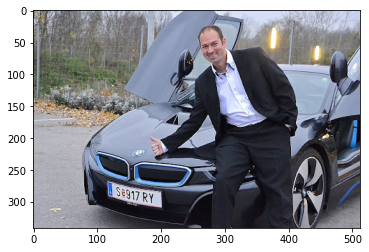

In [6]:
plt.imshow(image) # BGR
# Convert it to RGB
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

In [7]:
# Set up the configuration

model.setInputSize(320, 320)
model.setInputScale(1.0/ 127/5) ##255/2 = 127.5
model.setInputMean((127.5, 127.5, 127.5)) # mobilenet => [-1, 1]
model.setInputSwapRB(True)

<dnn_Model 0000022E41774CD0>

In [8]:
ClassIndex, confidence, bbox = model.detect(image, confThreshold=0.5)
print(ClassIndex)

[[1]
 [3]
 [3]]


In [9]:
font_scale = 3
font = cv.FONT_HERSHEY_PLAIN

for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    # cv.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # cv.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
    cv.rectangle(image, boxes, (255, 0, 0), 2)
    cv.putText(image, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cv.imshow("Display Image", image)
cv.waitKey(0)

-1

## Video Demo

In [13]:
cap = cv.VideoCapture("Demo.mp4")

# Checking if the video is opened correctly or not
if not cap.isOpened():
    cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Video")

font_scale = 3
font = cv.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    classIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    print(classIndex)
    
    if len(classIndex) != 0:
        for ClassInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd <= 80):
                cv.rectangle(frame, boxes, (255, 0, 0), 2)
                cv.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 125, 255), thickness=1)
    
    cv.imshow('Object Detection Video Demo', frame)
    
    if cv.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()        

[[3]
 [1]
 [1]]
[[3]
 [1]
 [1]]
[[3]
 [1]
 [1]]
[[3]
 [1]
 [1]]
[[3]
 [1]
 [6]]
[[3]
 [1]
 [6]]
[[3]
 [1]
 [1]
 [6]]
[[3]
 [1]
 [1]
 [6]]
[[3]
 [1]
 [1]
 [6]]
[[3]
 [1]
 [1]
 [6]]
[[3]
 [1]
 [1]
 [6]]
[[3]
 [1]
 [1]
 [6]]
[[3]
 [1]
 [6]]
[[3]
 [1]
 [1]
 [6]]
[[3]
 [1]
 [1]
 [6]]
[[3]
 [1]
 [1]
 [6]]
[[3]
 [1]
 [1]
 [6]]
[[3]
 [1]
 [1]
 [6]]
[[3]
 [1]
 [1]
 [6]
 [6]]
[[1]
 [3]
 [1]
 [6]
 [6]]
[[1]
 [3]
 [1]
 [6]
 [6]]
[[1]
 [3]
 [1]
 [6]
 [6]]
[[1]
 [3]
 [1]
 [6]
 [6]]
[[1]
 [3]
 [6]
 [1]
 [6]]
[[1]
 [3]
 [6]
 [6]]
[[1]
 [3]
 [6]
 [6]]
[[1]
 [3]
 [6]
 [6]]
[[1]
 [3]
 [1]
 [6]]
[[1]
 [3]
 [1]]
[[1]
 [3]
 [1]]
[[1]
 [3]
 [1]]
[[1]
 [3]
 [1]]
[[1]
 [1]
 [3]
 [3]]
[[1]
 [1]
 [3]]
[[1]
 [3]
 [1]
 [3]]


## Webcam 

In [21]:
cap = cv.VideoCapture(0)

# Checking if the video is opened correctly or not
if not cap.isOpened():
    cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Video")

font_scale = 3
font = cv.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    classIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    print(classIndex)
    
    if len(classIndex) != 0:
        for ClassInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd <= 80):
                cv.rectangle(frame, boxes, (255, 0, 0), 2)
                cv.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 0, 255), thickness=1)
    
    cv.imshow('Object Detection Video Demo', frame)
    
    if cv.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()        

()
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[[1]]
[[1]]
[[1]]
[[1]]
()
()
()
[[65]]
[[65]]
[[65]]
[[65]]
[[65]]
[[65]]
[[65]]
[[65]]
[[65]]
[[65]]
[[65]]
()
[[65]]
()
()
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]